## Práctica Machine Learning
#### Clasificación de patrones técnicos

Este cuaderno incluye un script para el etiquetado de gráficas de velas, que son
elegidas de forma aleatoria a partir de los datos diarios del IBEX35.
Para más detalle consultar el enunciado de la práctica

Se requiere la instalación de mpl_finance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
with open('../data/benchmark_data.pkl', 'rb') as handle:
    bm = pickle.load(handle)

In [4]:
ibex = bm['ibex']

In [5]:
ibex.head()

,close,high,low,open,vol
2000-01-03,11610.0,11881.8,11574.4,11846.6,60107000.0
2000-01-04,11206.6,11530.0,11159.8,11499.5,62539000.0
2000-01-05,10863.1,11068.1,10824.9,11206.6,68153000.0
2000-01-07,11102.4,11137.9,10882.7,10963.4,144207000.0
2000-01-10,11173.3,11364.3,11120.6,11363.8,133817000.0


In [6]:
from mpl_finance import candlestick2_ohlc

/home/acp/Desktop/proyectos/virtualenvs/machine_learning/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


*mpl_finance* es uan librería de python que permite la generación de gráficos
de velas de forma sencilla.  A continuación se muestra un ejemplo. Primero se 
elige una ventana temporal y luego se pasan los datos de cada serie OHLC

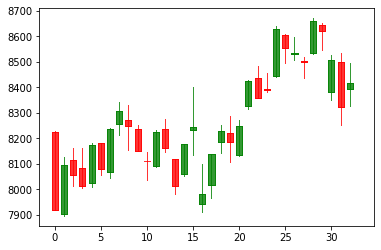

In [7]:
windata = ibex.loc["2013-02-03":"2013-03-20"]
fig, ax = plt.subplots(figsize=(6,4))
_ = candlestick2_ohlc(ax, windata.open, windata.high,
                          windata.low, windata.close,
                          colorup='g', colordown='r', width=0.66, alpha=0.8)
plt.show()

Si se necesita guardar el gráfico

In [8]:
fig.savefig('doble_suelo3.pdf', format='pdf')

___

#### Bucle de Etiquetado 
El siguiente código es un bucle que:
1. Elige una posición aleatoria de la serie para crear una ventana de 30 días
2. Dibuja el gráfico de velas 
3. Pide al usuario que introduzca un número para etiquetar la gráfica.

Primero hay que elegir el tamaño de la ventana y el número de ejemplos que se quieren generar.  
Se tiene la opción de descartar algún ejemplo si no se quiere incluir (ej. posiblemente ambiguo)

In [ ]:
window = 30
n = 100

In [ ]:
## %matplotlib inline
etiquetas = np.zeros(n)
idfechas = np.zeros(n)
for i in range(n):
    idx = np.random.randint(0, ibex.shape[0] - window)
    idfechas[i] = idx
    
    windata = ibex.iloc[idx:idx+window]
    fig, ax = plt.subplots(figsize=(6,4))
    _ = candlestick2_ohlc(ax, windata.open, windata.high,
                         windata.low, windata.close,
                         colorup='g', colordown='r', width=0.66, alpha=0.8)
    plt.show()
    print(f'Ejemplo {i+1} de {n}')
    print("Etiquete la siguiete grafica como:")
    print(" [1] Doble suelo, [0] Sin doble suelo, [2] Descartar ejemplo")
    opcion_usuario = input()
    
    if opcion_usuario >= '0' and opcion_usuario <= '2':
        etiquetas[i] = opcion_usuario   
    else:

        print('Error en la opción introducida. Ejemplo descartado')
        etiquetas[i] = 2
        break
        
        


In [ ]:
doble_suelo_labels = pd.Series(etiquetas, index=ibex.index[idfechas.astype(np.int)])

Descartamos las etiquetas descartadas

In [ ]:
doble_suelo_labels = doble_suelo_labels[doble_suelo_labels!=2]

In [ ]:
doble_suelo_labels

In [ ]:
doble_suelo_labels.value_counts()

Guardamos el fichero en CSV para su posterior procesamiento

In [ ]:
doble_suelo_labels.to_csv('ejemplos_doble_suelo_20.csv')